In [11]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=123492 sha256=9f45b48238b044591c329e0ec05fac0b1132da4ea6185fe68ac94ac327bd0bb0
  Stored in directory: /tmp/pip-ephem-wheel-cache-hcy1xtgp/wheels/a5/b6/52/18c617da8ab7981501f28a49d398fa4ccca532d1baece44b1e
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may 

In [1]:
import straph as sg
import pandas as pd
import matplotlib.pyplot as plt
import straph.betweenness as bt
import numpy

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

In [3]:
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "latapy_test_intro_nodes.sg",
                      path_links=path_directory + "latapy_test_intro_links.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  12
Nb of segmented links :  32.0
Nb of event times :  26


In [4]:
bt.to_undirected(S)

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


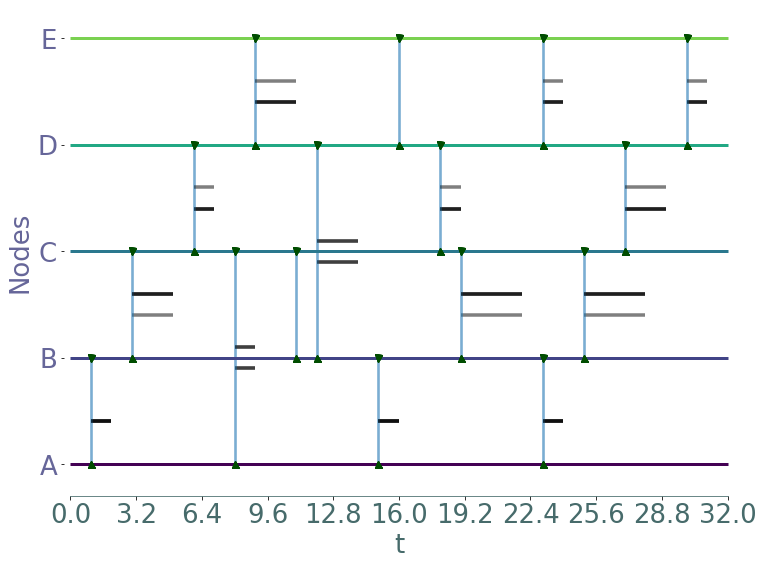

In [5]:
S.plot()

In [6]:
SS = S.stream_graph_to_link_stream()

In [7]:
#SS.write_to_matthieu_link_stream("erdos" + str(nb_erdos))

In [8]:
betweenness, general_contri, nouveau, events, sigma_r, latency, prev_next , contri, before, after, features = bt.betweenness_all(SS)

0
********** (9.0, 11.0) **************
[(3, 6.0), (3, 7.0), (4, 11.0)]
///////////////////////
(4, 11.0) {} {(4, 11.0)}
(3, 7.0) {} {(3, 7.0)}
(4, 11.0) {} {(3, 7.0)}
(3, 6.0) {} {(3, 6.0)}
(4, 11.0) {} {(3, 6.0)}
********** (6.0, 7.0) **************
[(2, 3.0), (2, 5.0), (3, 7.0)]
///////////////////////
(3, 7.0) {} {(3, 7.0)}
(2, 5.0) {} {(2, 5.0)}
(3, 7.0) {} {(2, 5.0)}
(2, 3.0) {} {(2, 3.0)}
(3, 7.0) {} {(2, 3.0)}
********** (3.0, 5.0) **************
[(1, 2.0), (2, 5.0)]
///////////////////////
(2, 5.0) {} {(2, 5.0)}
(1, 2.0) {} {(1, 2.0)}
(2, 5.0) {} {(1, 2.0)}
********** (18.0, 19.0) **************
[(2, 19.0), (3, 19.0)]
///////////////////////
(3, 19.0) {} {(3, 19.0)}
(2, 19.0) {} {(2, 19.0)}
(3, 19.0) {} {(2, 19.0)}
********** (23.0, 24.0) **************
[(3, 19.0), (4, 24.0)]
///////////////////////
(4, 24.0) {} {(4, 24.0)}
(3, 19.0) {} {(3, 19.0)}
(4, 24.0) {} {(3, 19.0)}
********** (19.0, 22.0) **************
[(1, 16.0), (2, 22.0)]
///////////////////////
(2, 22.0) {} {(2, 2

In [9]:
import os
check_exec = 0
for v in SS.nodes:
    for w in SS.nodes:
        if v !=w:
            cmd = 'python2 archive_code/latencylist.py '+ str(SS.node_to_label[v]) + ' Test/ex-intro_mat.ls lol'
            res_exec = os.system(cmd)
            check_exec += res_exec
            #print(latency[v][w])
            for x,y,z in latency[v][w]:
                print("moi",v,w,x,y)    
                prevnex = bt.read_dictionary("archive_code/lol_latency_prev_next.pic")
                #print(prevnex)
                if y in prev_next[v][w]:
                    print(prev_next[v][w][y])
                    prev_next[v][w][y] = [contri[v][w][y][0]] + prev_next[v][w][y] + [contri[v][w][y][1]]
                    prev_next[v][w][y].sort()
                    prevnex[SS.node_to_label[v],SS.node_to_label[w],x,y].sort()
                    #print(prev_next[v][w][y], prevnex[SS.node_to_label[v],SS.node_to_label[w],x,y])
                    if prev_next[v][w][y] != prevnex[SS.node_to_label[v],SS.node_to_label[w],x,y]:
                        print("problem",v,w,x,y,prev_next[v][w][y],prevnex[SS.node_to_label[v],SS.node_to_label[w],x,y])
print(res_exec)

(0.0, 32.0)
('A', 'A', 1.0, 1.0)
({1.0: 1.0, 2.0: 2.0, 3.0: 3.0, 5.0: 5.0, 6.0: 6.0, 7.0: 7.0, 8.0: 8.0, 9.0: 9.0, 11.0: 11.0, 12.0: 12.0, 14.0: 14.0, 15.0: 15.0, 16.0: 16.0, 18.0: 18.0, 19.0: 19.0, 22.0: 22.0, 23.0: 23.0, 24.0: 24.0, 25.0: 25.0, 27.0: 27.0, 28.0: 28.0, 29.0: 29.0, 30.0: 30.0, 31.0: 31.0}, [(1.0, 1.0), (2.0, 2.0), (3.0, 3.0), (5.0, 5.0), (6.0, 6.0), (7.0, 7.0), (8.0, 8.0), (9.0, 9.0), (11.0, 11.0), (12.0, 12.0), (14.0, 14.0), (15.0, 15.0), (16.0, 16.0), (18.0, 18.0), (19.0, 19.0), (22.0, 22.0), (23.0, 23.0), (24.0, 24.0), (25.0, 25.0), (27.0, 27.0), (28.0, 28.0), (29.0, 29.0), (30.0, 30.0), (31.0, 31.0)])
('res1', [])
('res1 after', [1.0])
('res2', [])
('res2 after', [1.0])
('A', 'A', 2.0, 2.0)
({1.0: 1.0, 2.0: 2.0, 3.0: 3.0, 5.0: 5.0, 6.0: 6.0, 7.0: 7.0, 8.0: 8.0, 9.0: 9.0, 11.0: 11.0, 12.0: 12.0, 14.0: 14.0, 15.0: 15.0, 16.0: 16.0, 18.0: 18.0, 19.0: 19.0, 22.0: 22.0, 23.0: 23.0, 24.0: 24.0, 25.0: 25.0, 27.0: 27.0, 28.0: 28.0, 29.0: 29.0, 30.0: 30.0, 31.0: 31.0}, [(1.

({1.0: 1.0, 2.0: 2.0, 3.0: 3.0, 5.0: 5.0, 6.0: 6.0, 7.0: 7.0, 8.0: 8.0, 9.0: 9.0, 11.0: 11.0, 12.0: 12.0, 14.0: 14.0, 15.0: 15.0, 16.0: 16.0, 18.0: 18.0, 19.0: 19.0, 22.0: 22.0, 23.0: 23.0, 24.0: 24.0, 25.0: 25.0, 27.0: 27.0, 28.0: 28.0, 29.0: 29.0, 30.0: 30.0, 31.0: 31.0}, [(1.0, 1.0), (2.0, 2.0), (3.0, 3.0), (5.0, 5.0), (6.0, 6.0), (7.0, 7.0), (8.0, 8.0), (9.0, 9.0), (11.0, 11.0), (12.0, 12.0), (14.0, 14.0), (15.0, 15.0), (16.0, 16.0), (18.0, 18.0), (19.0, 19.0), (22.0, 22.0), (23.0, 23.0), (24.0, 24.0), (25.0, 25.0), (27.0, 27.0), (28.0, 28.0), (29.0, 29.0), (30.0, 30.0), (31.0, 31.0)])
('res1', [])
('res1 after', [28.0])
('res2', [])
('res2 after', [28.0])
('C', 'C', 29.0, 29.0)
({1.0: 1.0, 2.0: 2.0, 3.0: 3.0, 5.0: 5.0, 6.0: 6.0, 7.0: 7.0, 8.0: 8.0, 9.0: 9.0, 11.0: 11.0, 12.0: 12.0, 14.0: 14.0, 15.0: 15.0, 16.0: 16.0, 18.0: 18.0, 19.0: 19.0, 22.0: 22.0, 23.0: 23.0, 24.0: 24.0, 25.0: 25.0, 27.0: 27.0, 28.0: 28.0, 29.0: 29.0, 30.0: 30.0, 31.0: 31.0}, [(1.0, 1.0), (2.0, 2.0), (3.0, 3.

({16.0: 19.0, 24.0: 27.0, 11.0: 12.0}, [(11.0, 12.0), (16.0, 19.0), (24.0, 27.0)])
('res1', [(11.0, (0.0, 0))])
('res1 after', [12.0])
('res2', [(27.0, (0.0, 0)), (32.0, (1.0, 0))])
('res2 after', [27.0, 32.0])
('E', 'B', 24.0, 27.0)
({16.0: 19.0, 24.0: 27.0, 11.0: 12.0}, [(11.0, 12.0), (16.0, 19.0), (24.0, 27.0)])
('res1', [(16.0, (0.0, 0)), (11.0, (1.0, 1))])
('res1 after', [12.0, 19.0])
('res2', [(32.0, (0.0, 0))])
('res2 after', [32.0])
('E', 'E', 1.0, 1.0)
({1.0: 1.0, 2.0: 2.0, 3.0: 3.0, 5.0: 5.0, 6.0: 6.0, 7.0: 7.0, 8.0: 8.0, 9.0: 9.0, 11.0: 11.0, 12.0: 12.0, 14.0: 14.0, 15.0: 15.0, 16.0: 16.0, 18.0: 18.0, 19.0: 19.0, 22.0: 22.0, 23.0: 23.0, 24.0: 24.0, 25.0: 25.0, 27.0: 27.0, 28.0: 28.0, 29.0: 29.0, 30.0: 30.0, 31.0: 31.0}, [(1.0, 1.0), (2.0, 2.0), (3.0, 3.0), (5.0, 5.0), (6.0, 6.0), (7.0, 7.0), (8.0, 8.0), (9.0, 9.0), (11.0, 11.0), (12.0, 12.0), (14.0, 14.0), (15.0, 15.0), (16.0, 16.0), (18.0, 18.0), (19.0, 19.0), (22.0, 22.0), (23.0, 23.0), (24.0, 24.0), (25.0, 25.0), (27.0, 2

In [10]:
latency[4][1]

[[11.0, 12.0, 2], [16.0, 19.0, 3], [24.0, 27.0, 3]]

In [11]:
before[4][1]

{0.0: False,
 1.0: False,
 2.0: False,
 3.0: False,
 5.0: False,
 6.0: False,
 7.0: False,
 8.0: False,
 9.0: False,
 11.0: False,
 12.0: False,
 14.0: False,
 15.0: False,
 16.0: False,
 18.0: False,
 19.0: False,
 22.0: False,
 23.0: False,
 24.0: False,
 25.0: False,
 27.0: False,
 28.0: False,
 29.0: False,
 30.0: False,
 31.0: False,
 32.0: False}

In [12]:
after[4][1]

{0.0: False,
 1.0: False,
 2.0: False,
 3.0: False,
 5.0: False,
 6.0: False,
 7.0: False,
 8.0: False,
 9.0: False,
 11.0: False,
 12.0: False,
 14.0: False,
 15.0: False,
 16.0: False,
 18.0: False,
 19.0: False,
 22.0: False,
 23.0: False,
 24.0: False,
 25.0: False,
 27.0: False,
 28.0: False,
 29.0: False,
 30.0: False,
 31.0: False,
 32.0: False}

In [18]:
S.omega

32.0

In [15]:
contri[0][1][1.0]

(0.0, 1.0)